### ✅ What I have done in this notebook:

- Performed **data cleaning**
- Dropped 3 irrelevant features: `'RowNumber'`, `'CustomerId'`, `'Surname'`
- Retained the `'Geography'` feature after analysis, as it provides valuable information contributing to the prediction performance. 
- Split the dataset into a **70:30 train-test ratio**
- Handled **class imbalance** by oversampling the minority class using the `resample()` technique
- Applied **feature scaling** and **label encoding**
- Trained and evaluated **8 machine learning models**:
  - Logistic Regression  
  - K-Nearest Neighbors (KNN)  
  - Naive Bayes  
  - Support Vector Machine (SVM)  
  - Decision Tree  
  - Random Forest  
  - XGBoost  
  - AdaBoost  
- Performed **5-fold cross-validation** on all models
- Applied **hyperparameter tuning** using `GridSearchCV` for Random forest, AdaBoost, SVM, XGBoost, Logistic Regression, Decision Trees



# 1. Data Loading + Cleaning

#### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.impute import SimpleImputer

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

#### Load Dataset

In [2]:
# Load the CSV file
df = pd.read_csv("Churn_Modelling.csv")

# Display the first 5 rows
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


#### Basic Info & Summary

In [3]:
# Shape of the dataset
print("Shape of dataset:", df.shape)

# Data types and non-null info
df.info()

# Statistical summary
df.describe()


Shape of dataset: (10002, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


#### Drop Unnecessary Columns

In [4]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


#### Check for Missing Values

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values Before Filling:\n", missing_values)

Missing Values Before Filling:
 CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64


#### Check for Duplicates

In [6]:
# Check for duplicate rows in the dataset
duplicate_rows = df[df.duplicated()]

# Count the number of duplicate rows
num_duplicates = duplicate_rows.shape[0]

# Display the duplicate rows and the count
duplicate_rows, num_duplicates

(       CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
 9999           772   Germany    Male  42.0       3   75075.31              2   
 10001          792    France  Female  28.0       4  130142.79              1   
 
        HasCrCard  IsActiveMember  EstimatedSalary  Exited  
 9999         1.0             0.0         92888.52       1  
 10001        1.0             0.0         38190.78       0  ,
 2)

#### Remove duplicate rows

In [7]:
# Remove duplicate rows
df = df.drop_duplicates()

# Recheck the dataset for any remaining duplicate rows
remaining_duplicates = df[df.duplicated()]
num_remaining_duplicates = remaining_duplicates.shape[0]

# Display the count of remaining duplicates
num_remaining_duplicates

0

#### Fill missing values

In [8]:
# Fill missing values for 'HasCrCard' and 'IsActiveMember' using forward fill
df['HasCrCard'] = df['HasCrCard'].fillna(method='ffill')
df['IsActiveMember'] = df['IsActiveMember'].fillna(method='ffill')

# Fill missing value in 'Geography' with the mode (most frequent value)
geography_mode = df['Geography'].mode()[0]
df['Geography'].fillna(geography_mode, inplace=True)

# Fill missing value in 'Age' with the median
age_median = df['Age'].median()
df['Age'].fillna(age_median, inplace=True)

# Confirm that all missing values are filled
missing_values_final = df.isnull().sum()
print("Missing Values After Filling:\n", missing_values_final)

Missing Values After Filling:
 CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


#### Detect Anomalies

In [9]:
# Check for invalid age values
print("Min age:", df['Age'].min())
print("Max age:", df['Age'].max())

# Example: Remove rows where age is less than 18
df = df[df['Age'] >= 18]


Min age: 18.0
Max age: 92.0


# Encoding categorical features

#### Encode Categorical Columns

In [10]:
# Label Encoding for Gender (Binary)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male = 1, Female = 0

# One-Hot Encoding for Geography
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)
df.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42.0,2,0.00,1,1.0,1.0,101348.88,1,False,False
1,608,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0,False,True
2,502,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1,False,False
3,699,0,39.0,1,0.00,2,0.0,0.0,93826.63,0,False,False
4,850,0,43.0,2,125510.82,1,0.0,1.0,79084.10,0,False,True


#### Class Distribution of Target

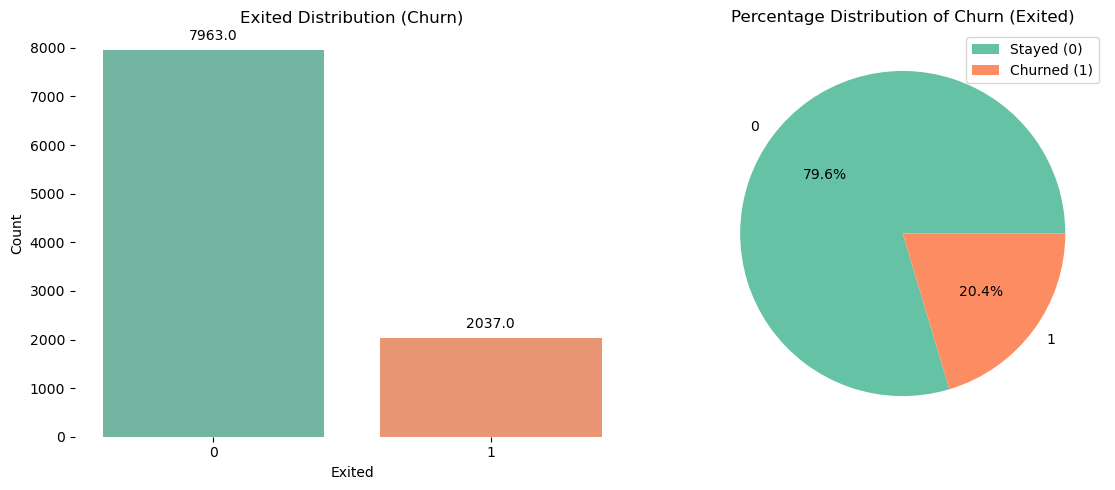

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
exited_counts = df['Exited'].value_counts()
sns.barplot(x=exited_counts.index, y=exited_counts, ax=axes[0], palette='Set2')
axes[0].set_title('Exited Distribution (Churn)')
axes[0].set_ylabel('Count')

for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')
sns.despine(left=True, bottom=True) 
    
exited_percentage = df['Exited'].value_counts(normalize=True) * 100
axes[1].pie(exited_percentage, labels=exited_percentage.index, autopct='%1.1f%%', 
            colors=sns.color_palette('Set2'))
axes[1].set_title('Percentage Distribution of Churn (Exited)')
plt.legend(['Stayed (0)', 'Churned (1)'])
plt.tight_layout()
plt.show()


# Exploratory Data Analysis (EDA)

#### Distribution of Numerical Features

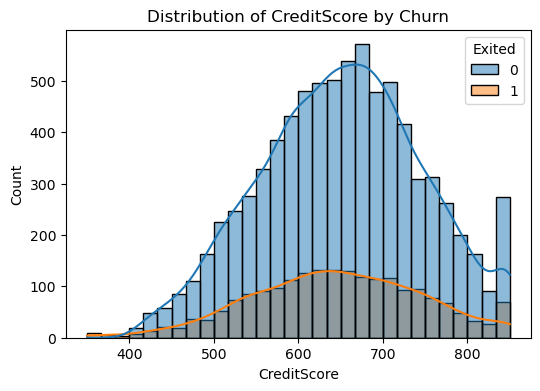

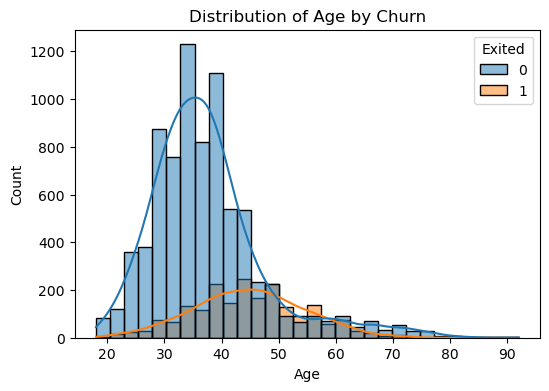

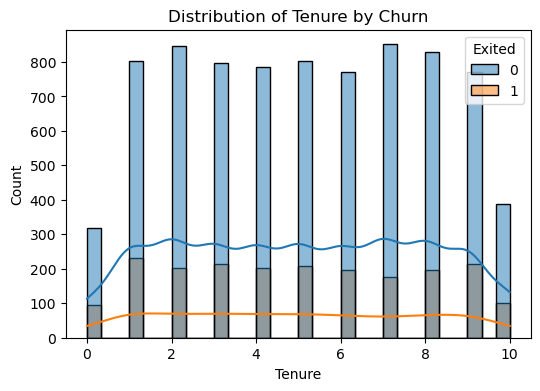

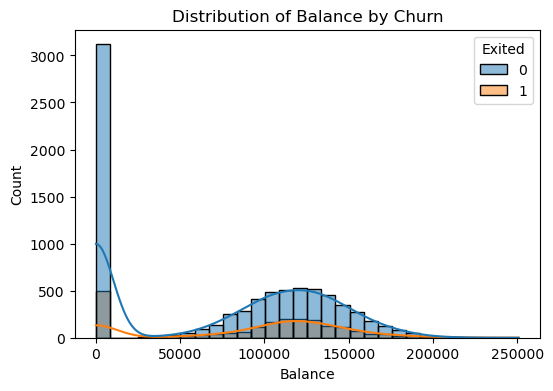

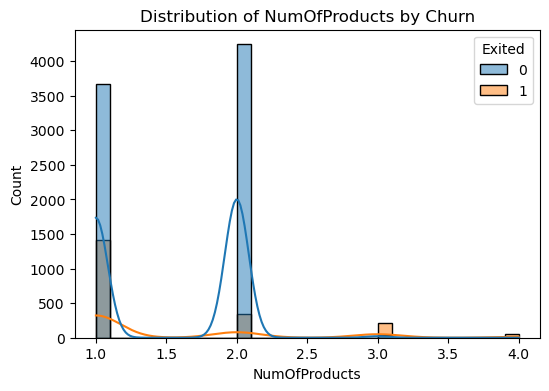

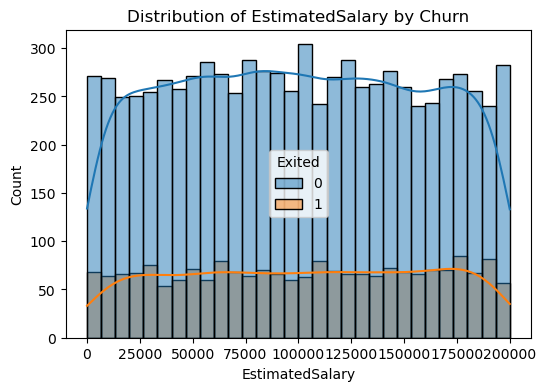

In [12]:
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue='Exited', kde=True, bins=30)
    plt.title(f'Distribution of {col} by Churn')
    plt.show()


#### Boxplots for Outlier Detection & Comparison

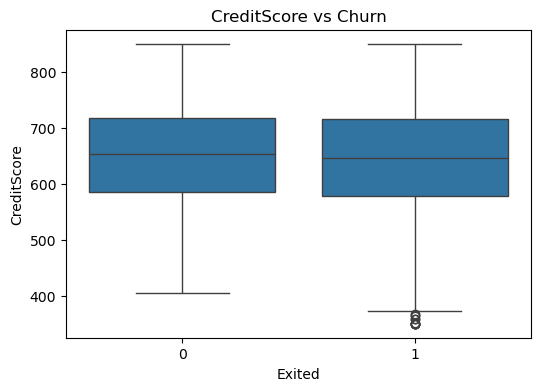

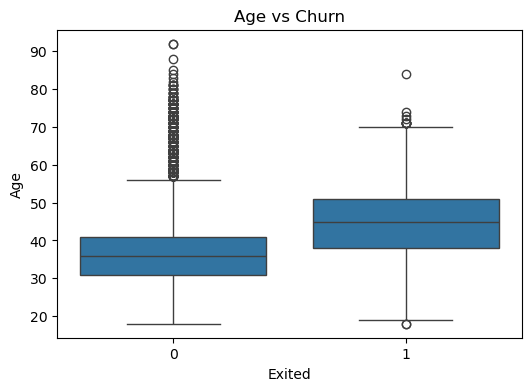

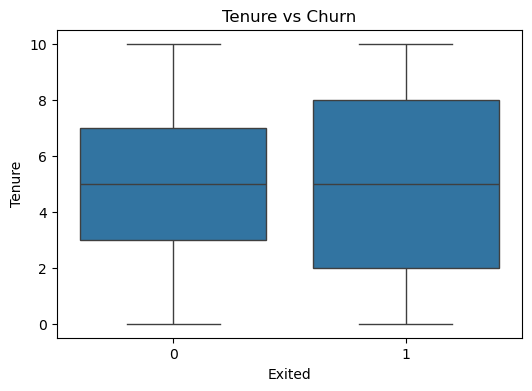

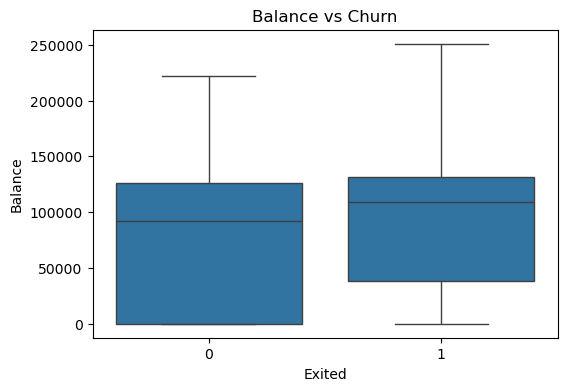

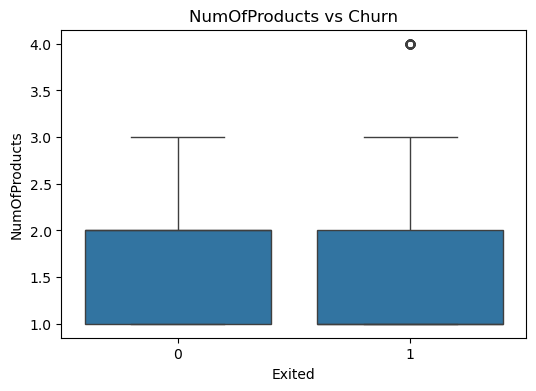

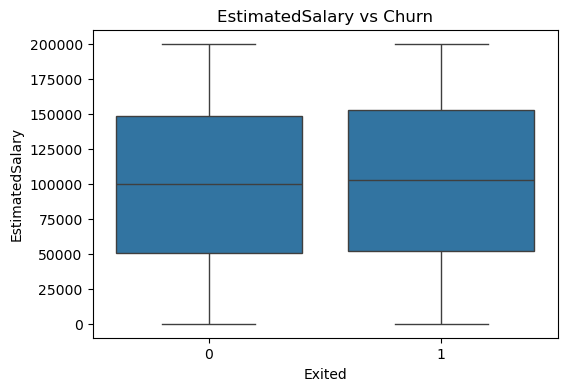

In [13]:
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Exited', y=col, data=df)
    plt.title(f'{col} vs Churn')
    plt.show()


#### Churn Rate by Gender

Churn Rate by Gender:
 Gender
0    0.250715
1    0.164559
Name: Exited, dtype: float64


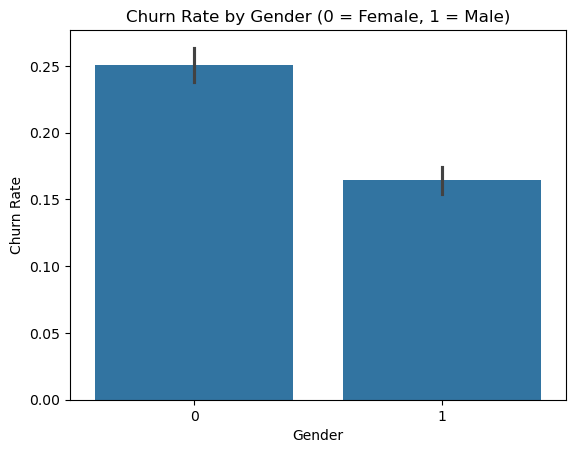

In [14]:
churn_by_gender = df.groupby('Gender')['Exited'].mean()
print("Churn Rate by Gender:\n", churn_by_gender)

sns.barplot(x='Gender', y='Exited', data=df)
plt.title("Churn Rate by Gender (0 = Female, 1 = Male)")
plt.ylabel("Churn Rate")
plt.show()


#### Churn by Geography

Churn rate for Geography_Germany = 1: 32.44%
Churn rate for Geography_Spain = 1: 16.67%


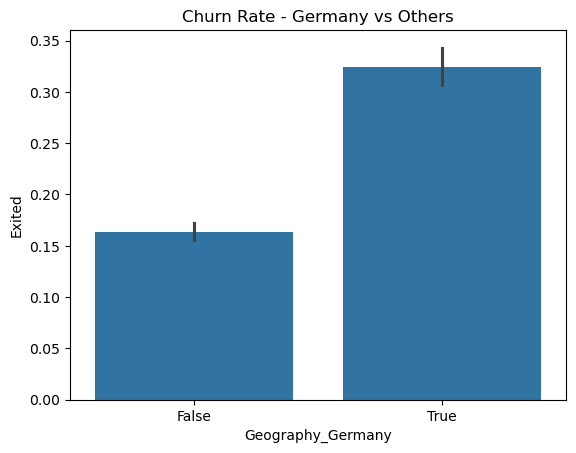

In [15]:
geo_cols = [col for col in df.columns if col.startswith("Geography_")]
df_geo = df[['Exited'] + geo_cols]

for col in geo_cols:
    churn_rate = df_geo.groupby(col)['Exited'].mean()
    print(f"Churn rate for {col} = 1: {churn_rate.iloc[1]:.2%}")
    
sns.barplot(x='Geography_Germany', y='Exited', data=df)
plt.title("Churn Rate - Germany vs Others")
plt.show()


#### Correlation Heatmap

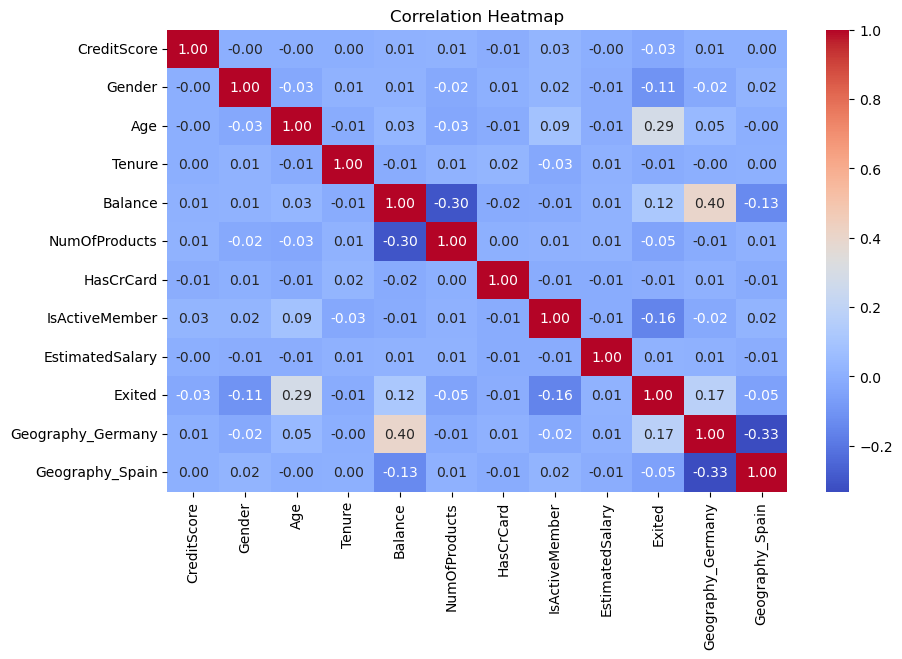

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


#### Feature-target Correlation

In [17]:
target_corr = df.corr()['Exited'].sort_values(ascending=False)
print("Feature Correlation with Churn:\n")
print(target_corr)


Feature Correlation with Churn:

Exited               1.000000
Age                  0.285288
Geography_Germany    0.173488
Balance              0.118533
EstimatedSalary      0.012097
HasCrCard           -0.007026
Tenure              -0.014001
CreditScore         -0.027094
NumOfProducts       -0.047820
Geography_Spain     -0.052667
Gender              -0.106512
IsActiveMember      -0.156026
Name: Exited, dtype: float64


# Oversampling

#### Oversample the minority class

In [18]:
majority_class = df[df['Exited'] == 0]
minority_class = df[df['Exited'] == 1]

# Oversample the minority class
minority_oversampled = resample(minority_class,
                                replace=True,
                                n_samples=len(majority_class),
                                random_state=42)

# Combine oversampled minority class with majority class
data_balanced = pd.concat([majority_class, minority_oversampled])

# Shuffle the dataset
data_balanced = data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Print new class distribution
print("\nNew Class Distribution After Oversampling:\n", data_balanced['Exited'].value_counts())


New Class Distribution After Oversampling:
 Exited
0    7963
1    7963
Name: count, dtype: int64


#### Visualize the class distribution before and after oversampling

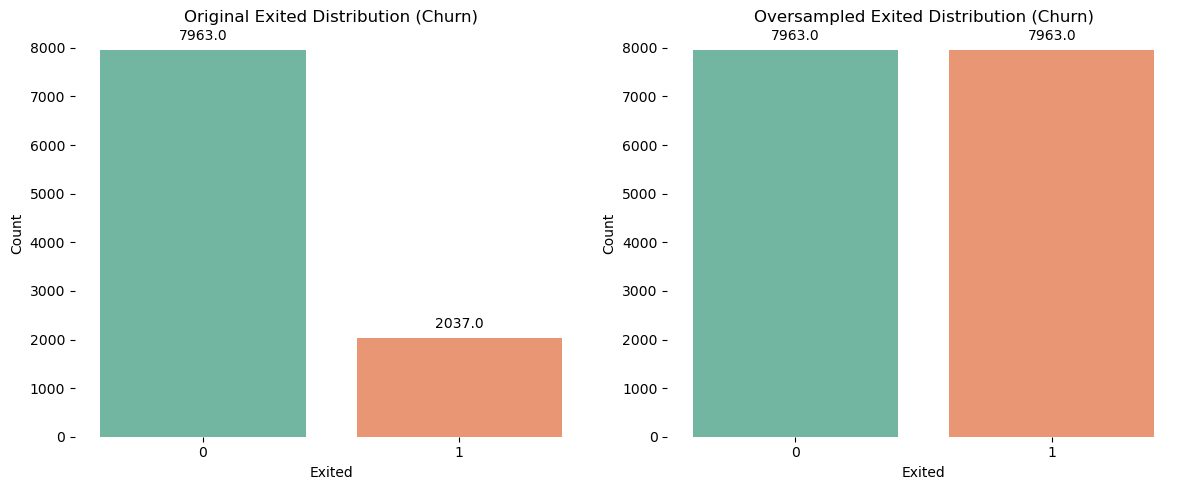

In [19]:
# Calculate original class distribution
original_class_distribution = df['Exited'].value_counts()

# Separate the majority and minority classes
majority_class = df[df['Exited'] == 0]
minority_class = df[df['Exited'] == 1]

# Oversample the minority class
minority_oversampled = resample(minority_class,
                                replace=True,
                                n_samples=len(majority_class),
                                random_state=42)

# Combine and shuffle the new balanced dataset
data_balanced = pd.concat([majority_class, minority_oversampled])
data_balanced = data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# New class distribution after balancing
df_balanced_distribution = data_balanced['Exited'].value_counts()

# === Class Distribution Visualization ===
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Original distribution
sns.barplot(x=original_class_distribution.index, y=original_class_distribution.values, ax=axes[0], palette='Set2')
axes[0].set_title('Original Exited Distribution (Churn)')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Exited')
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Balanced distribution
sns.barplot(x=df_balanced_distribution.index, y=df_balanced_distribution.values, ax=axes[1], palette='Set2')
axes[1].set_title('Oversampled Exited Distribution (Churn)')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Exited')
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

# Model Building and Training

#### Train-Test Split

In [20]:
X = data_balanced.drop('Exited', axis=1)
y = data_balanced['Exited']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Display the shape of the training and testing sets
print(f"Training Set: {X_train.shape}, {y_train.shape}")
print(f"Testing Set: {X_test.shape}, {y_test.shape}")

Training Set: (11148, 11), (11148,)
Testing Set: (4778, 11), (4778,)


#### Feature Scaling

In [21]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Define and Train Models

In [22]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "AdaBoost": AdaBoostClassifier()
}

print("Models initialized:", list(models.keys()))

Models initialized: ['Logistic Regression', 'KNN', 'Naive Bayes', 'SVM', 'Decision Tree', 'Random Forest', 'XGBoost', 'AdaBoost']


#### Train and Evaluate All Models


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.69      0.73      0.71      2389
           1       0.71      0.68      0.70      2389

    accuracy                           0.70      4778
   macro avg       0.70      0.70      0.70      4778
weighted avg       0.70      0.70      0.70      4778



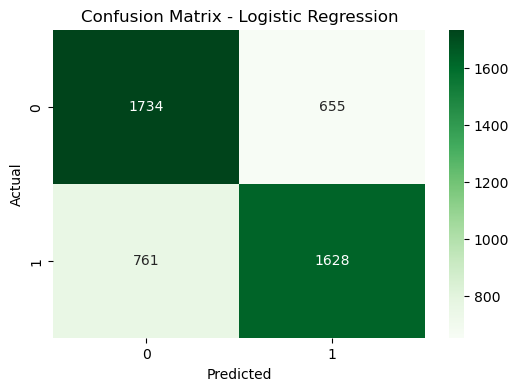


Model: KNN
              precision    recall  f1-score   support

           0       0.87      0.75      0.81      2389
           1       0.78      0.88      0.83      2389

    accuracy                           0.82      4778
   macro avg       0.82      0.82      0.82      4778
weighted avg       0.82      0.82      0.82      4778



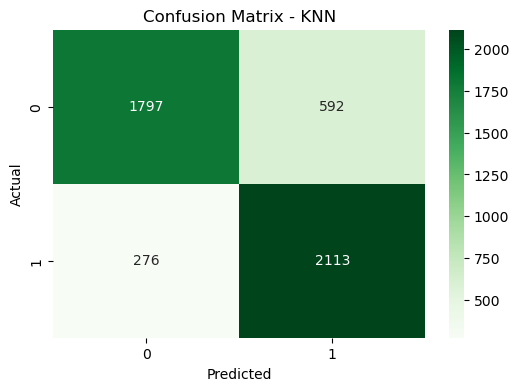


Model: Naive Bayes
              precision    recall  f1-score   support

           0       0.69      0.74      0.71      2389
           1       0.72      0.67      0.69      2389

    accuracy                           0.70      4778
   macro avg       0.71      0.70      0.70      4778
weighted avg       0.71      0.70      0.70      4778



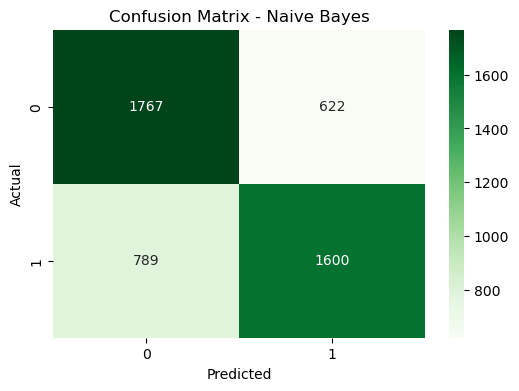


Model: SVM
              precision    recall  f1-score   support

           0       0.79      0.82      0.81      2389
           1       0.81      0.79      0.80      2389

    accuracy                           0.80      4778
   macro avg       0.80      0.80      0.80      4778
weighted avg       0.80      0.80      0.80      4778



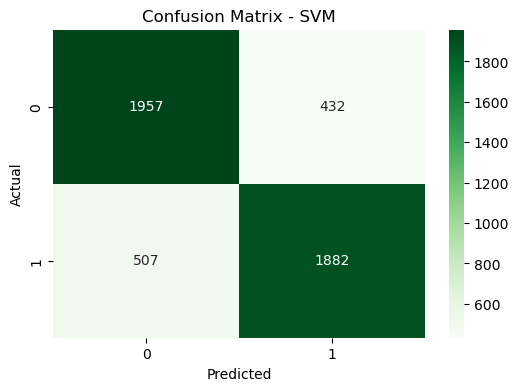


Model: Decision Tree
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      2389
           1       0.86      0.97      0.91      2389

    accuracy                           0.91      4778
   macro avg       0.91      0.91      0.91      4778
weighted avg       0.91      0.91      0.91      4778



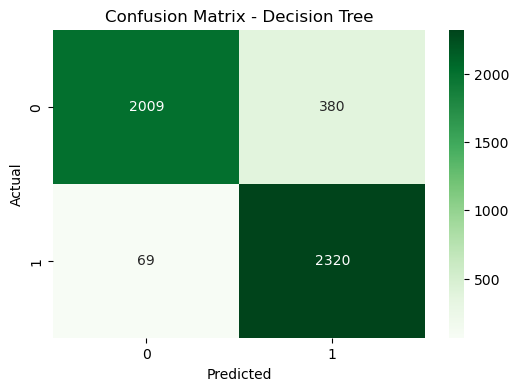


Model: Random Forest
              precision    recall  f1-score   support

           0       0.97      0.92      0.95      2389
           1       0.93      0.97      0.95      2389

    accuracy                           0.95      4778
   macro avg       0.95      0.95      0.95      4778
weighted avg       0.95      0.95      0.95      4778



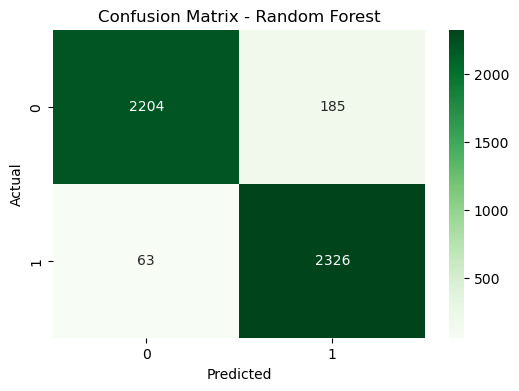


Model: XGBoost
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      2389
           1       0.87      0.92      0.90      2389

    accuracy                           0.89      4778
   macro avg       0.89      0.89      0.89      4778
weighted avg       0.89      0.89      0.89      4778



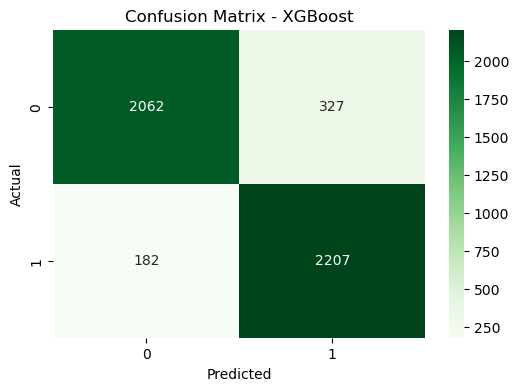


Model: AdaBoost
              precision    recall  f1-score   support

           0       0.75      0.79      0.77      2389
           1       0.78      0.74      0.76      2389

    accuracy                           0.77      4778
   macro avg       0.77      0.77      0.77      4778
weighted avg       0.77      0.77      0.77      4778



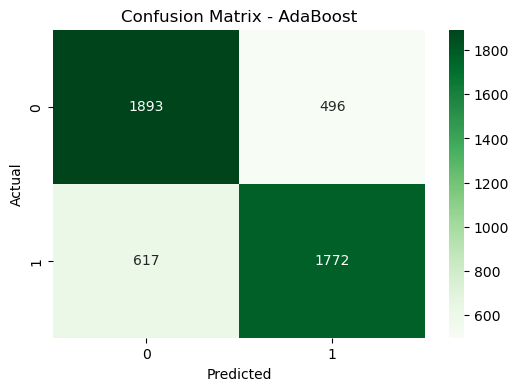


Model Accuracies:
Logistic Regression: 0.7036
KNN: 0.8183
Naive Bayes: 0.7047
SVM: 0.8035
Decision Tree: 0.9060
Random Forest: 0.9481
XGBoost: 0.8935
AdaBoost: 0.7671


In [23]:
# Function to train models and display results
def train_and_evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}
    
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy
        
        # Display classification report
        print(f"\nModel: {name}")
        print(classification_report(y_test, y_pred))
        
        # Plot confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
        plt.title(f'Confusion Matrix - {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
    
    return results

# Train and evaluate models
results = train_and_evaluate_models(models, X_train_scaled, X_test_scaled, y_train, y_test)

# Display model accuracies
print("\nModel Accuracies:")
for model, accuracy in results.items():
    print(f"{model}: {accuracy:.4f}")

#### Identify Best Model

In [24]:
# Identify the best model
best_model_name = max(results, key=results.get)
best_model_accuracy = results[best_model_name]
print(f"\nBest Model: {best_model_name} with Accuracy: {best_model_accuracy:.4f}")


Best Model: Random Forest with Accuracy: 0.9481


#### Feature Importances

In [25]:
# Plot feature importances only for tree-based models
if hasattr(best_model_name, 'feature_importances_'):
    feature_importances = best_model_name.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
    plt.title(f'Feature Importances - {best_model_name}', fontsize=16)
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
else:
    print(f"\nFeature importance is not available for {best_model_name}.")



Feature importance is not available for Random Forest.


# ROC-AUC and Precision-Recall Curve Evaluation

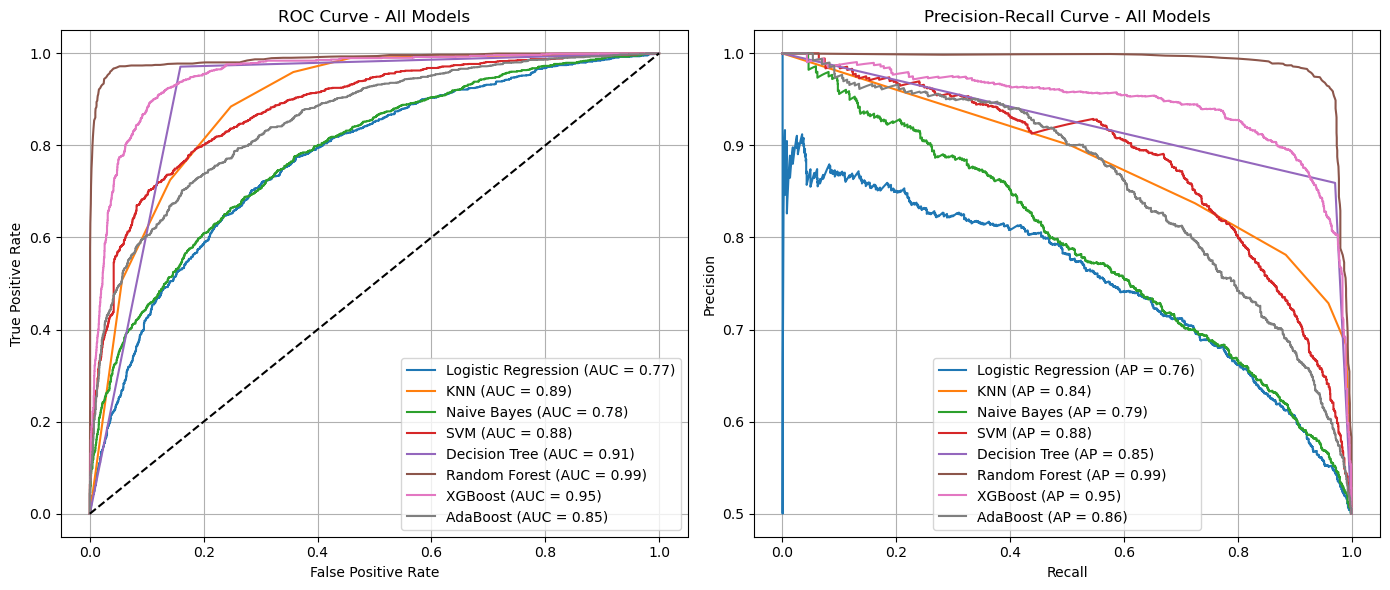

In [26]:
# Initialize figures
plt.figure(figsize=(14, 6))

# === ROC Curve ===
plt.subplot(1, 2, 1)
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        # For SVM which uses decision_function
        y_proba = model.decision_function(X_test_scaled)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)

# === Precision-Recall Curve ===
plt.subplot(1, 2, 2)
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = model.decision_function(X_test_scaled)

    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    ap = average_precision_score(y_test, y_proba)
    plt.plot(recall, precision, label=f"{name} (AP = {ap:.2f})")

plt.title("Precision-Recall Curve - All Models")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Cross-Validation

In [27]:
cv_results = []

# Evaluate each model
for name, model in models.items():
    if hasattr(model, "predict_proba") or hasattr(model, "decision_function"):
        # Accuracy
        acc_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
        # F1
        f1_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='f1')
        # ROC-AUC (use 'roc_auc' only for probabilistic classifiers)
        if hasattr(model, "predict_proba") or hasattr(model, "decision_function"):
            roc_auc_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
        else:
            roc_auc_scores = [np.nan] * 5

        cv_results.append({
            'Model': name,
            'Mean Accuracy': np.mean(acc_scores),
            'Mean F1 Score': np.mean(f1_scores),
            'Mean ROC-AUC': np.mean(roc_auc_scores)
        })

cv_df = pd.DataFrame(cv_results).sort_values(by='Mean ROC-AUC', ascending=False)
cv_df


,Model,Mean Accuracy,Mean F1 Score,Mean ROC-AUC
5,Random Forest,0.927610,0.930548,0.979222
6,XGBoost,0.888859,0.892162,0.947746
4,Decision Tree,0.882939,0.891934,0.886258
3,SVM,0.793594,0.791383,0.875310
1,KNN,0.786867,0.795411,0.869780
7,AdaBoost,0.770273,0.766459,0.853987
2,Naive Bayes,0.709454,0.702024,0.787055
0,Logistic Regression,0.702994,0.699797,0.770015


# Hyperparameter Tuning with GridSearchCV

In [28]:
def evaluate_and_plot_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"\n\033[1mModel: {name}\033[0m")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.title(f'Confusion Matrix - {name}', fontsize=14)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


#### Random Forest Hyperparameter Tuning

Fitting 5 folds for each of 24 candidates, totalling 120 fits

🔍 Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
✅ Best RF ROC-AUC Score (CV): 0.9795428442986841

Model: Random Forest (Tuned)
              precision    recall  f1-score   support

           0       0.97      0.92      0.95      2389
           1       0.93      0.97      0.95      2389

    accuracy                           0.95      4778
   macro avg       0.95      0.95      0.95      4778
weighted avg       0.95      0.95      0.95      4778



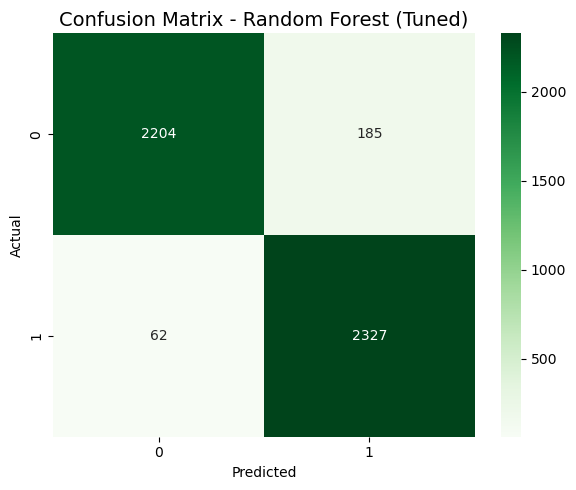

In [29]:
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train_scaled, y_train)

print("\n🔍 Best Random Forest Parameters:", rf_grid.best_params_)
print("✅ Best RF ROC-AUC Score (CV):", rf_grid.best_score_)

best_rf = rf_grid.best_estimator_
evaluate_and_plot_model("Random Forest (Tuned)", best_rf, X_test_scaled, y_test)


#### Decision Trees

Fitting 5 folds for each of 90 candidates, totalling 450 fits

🔍 Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10}
✅ Best Decision Tree ROC-AUC Score (CV): 0.8995312269340039

Model: Decision Tree (Tuned)
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      2389
           1       0.85      0.89      0.87      2389

    accuracy                           0.87      4778
   macro avg       0.87      0.87      0.87      4778
weighted avg       0.87      0.87      0.87      4778



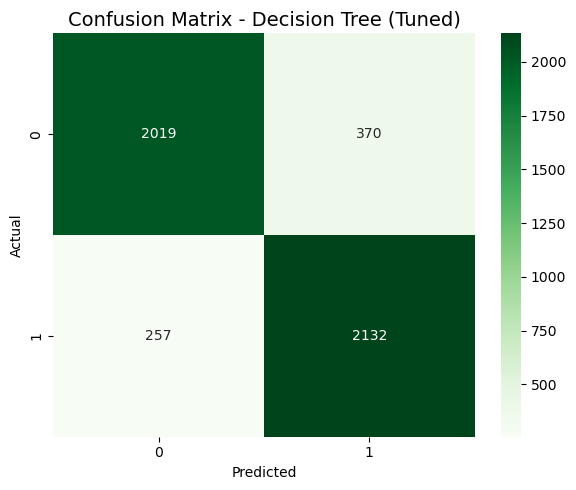

In [30]:
# Define the hyperparameter grid for Decision Tree
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
dt_grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=dt_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# Fit the grid search to the training data
dt_grid.fit(X_train_scaled, y_train)

# Display best parameters and best ROC-AUC score
print("\n🔍 Best Decision Tree Parameters:", dt_grid.best_params_)
print("✅ Best Decision Tree ROC-AUC Score (CV):", dt_grid.best_score_)

# Evaluate on test set
best_dt = dt_grid.best_estimator_
evaluate_and_plot_model("Decision Tree (Tuned)", best_dt, X_test_scaled, y_test)

#### XGBoost Hyperparameter Tuning

Fitting 5 folds for each of 24 candidates, totalling 120 fits

🔍 Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}
✅ Best XGBoost ROC-AUC Score (CV): 0.9695165618839026

Model: XGBoost (Tuned)
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      2389
           1       0.90      0.97      0.94      2389

    accuracy                           0.93      4778
   macro avg       0.94      0.93      0.93      4778
weighted avg       0.94      0.93      0.93      4778



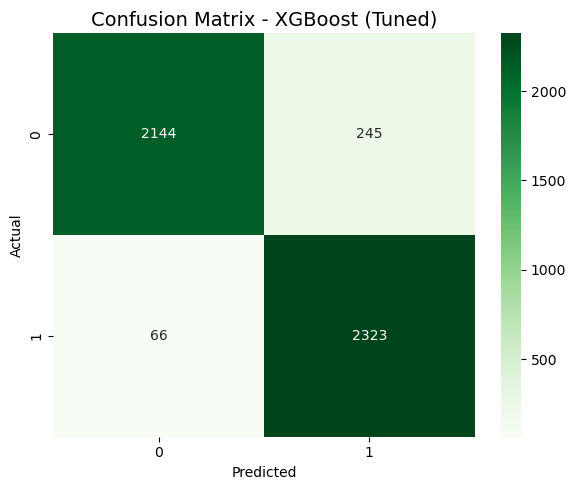

In [31]:
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 1.0]
}

xgb_grid = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_grid=xgb_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

xgb_grid.fit(X_train_scaled, y_train)

print("\n🔍 Best XGBoost Parameters:", xgb_grid.best_params_)
print("✅ Best XGBoost ROC-AUC Score (CV):", xgb_grid.best_score_)

best_xgb = xgb_grid.best_estimator_
evaluate_and_plot_model("XGBoost (Tuned)", best_xgb, X_test_scaled, y_test)


#### AdaBoost Hyperparameter Tuning

Fitting 5 folds for each of 9 candidates, totalling 45 fits

🔍 Best AdaBoost Parameters: {'learning_rate': 1.5, 'n_estimators': 200}
✅ Best AdaBoost ROC-AUC Score (CV): 0.862939981883135

Model: AdaBoost (Tuned)
              precision    recall  f1-score   support

           0       0.77      0.80      0.79      2389
           1       0.79      0.76      0.78      2389

    accuracy                           0.78      4778
   macro avg       0.78      0.78      0.78      4778
weighted avg       0.78      0.78      0.78      4778



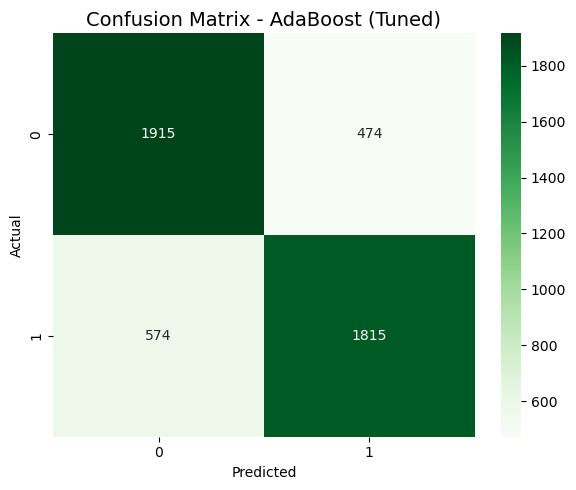

In [32]:
ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.5, 1.0, 1.5]
}

ada_grid = GridSearchCV(
    estimator=AdaBoostClassifier(random_state=42),
    param_grid=ada_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

ada_grid.fit(X_train_scaled, y_train)

print("\n🔍 Best AdaBoost Parameters:", ada_grid.best_params_)
print("✅ Best AdaBoost ROC-AUC Score (CV):", ada_grid.best_score_)

best_ada = ada_grid.best_estimator_
evaluate_and_plot_model("AdaBoost (Tuned)", best_ada, X_test_scaled, y_test)


#### SVM

In [ ]:
# Define the hyperparameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Create the GridSearchCV object
svm_grid = GridSearchCV(
    estimator=SVC(probability=True, random_state=42),  # enable probability=True for ROC-AUC
    param_grid=svm_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# Fit the grid search to the training data
svm_grid.fit(X_train_scaled, y_train)

# Display best parameters and best ROC-AUC score
print("\n🔍 Best SVM Parameters:", svm_grid.best_params_)
print("✅ Best SVM ROC-AUC Score (CV):", svm_grid.best_score_)

# Evaluate on test set
best_svm = svm_grid.best_estimator_
evaluate_and_plot_model("SVM (Tuned)", best_svm, X_test_scaled, y_test)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


#### Logistic Regression

Fitting 5 folds for each of 20 candidates, totalling 100 fits

🔍 Best Logistic Regression Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
✅ Best Logistic Regression ROC-AUC Score (CV): 0.7706015812165131

Model: Logistic Regression (Tuned)
              precision    recall  f1-score   support

           0       0.70      0.73      0.71      2389
           1       0.72      0.69      0.70      2389

    accuracy                           0.71      4778
   macro avg       0.71      0.71      0.71      4778
weighted avg       0.71      0.71      0.71      4778



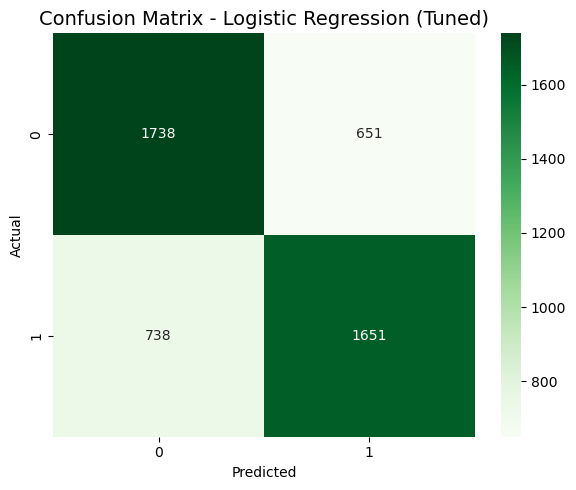

In [ ]:
# Define the hyperparameter grid
logreg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],              # Inverse of regularization strength
    'penalty': ['l1', 'l2'],                   # Regularization type
    'solver': ['liblinear', 'saga']            # Solvers that support both L1 and L2
}

# Create the GridSearchCV object
logreg_grid = GridSearchCV(
    estimator=LogisticRegression(random_state=42, max_iter=1000),
    param_grid=logreg_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# Fit the grid search to the training data
logreg_grid.fit(X_train_scaled, y_train)

# Display best parameters and best ROC-AUC score
print("\n🔍 Best Logistic Regression Parameters:", logreg_grid.best_params_)
print("✅ Best Logistic Regression ROC-AUC Score (CV):", logreg_grid.best_score_)

# Evaluate on test set
best_logreg = logreg_grid.best_estimator_
evaluate_and_plot_model("Logistic Regression (Tuned)", best_logreg, X_test_scaled, y_test)